In [1]:
%load_ext autoreload
%autoreload 2

In [20]:
import argparse
import torchvision.datasets as Datasets
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from tqdm import tqdm as tqdm_regular
from video_analysis import image_preprocessing
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
from video_analysis import conv_autoencoder 

In [31]:
class CustomDataset(Dataset):
    def __init__(self, data, transforms=None):
        self.data = data
        self.transforms = transforms
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        image = self.data[idx]
        if self.transforms!=None:
            image = self.transforms(image)
        return image

In [32]:
dataset_name = "CIFAR10"

In [33]:

print('Extracting features from ',  dataset_name)

Extracting features from  CIFAR10


In [73]:
if dataset_name == "CIFAR10":
    training_set = Datasets.CIFAR10(root='../data/', download=True,
                                transform=transforms.ToTensor())
    test_set = Datasets.CIFAR10(root='../data/', download=True, train=False,
                                transform=transforms.ToTensor())
    #  extracting training images
    training_images = [x for x in training_set.data]
    #  extracting validation images
    test_images = [x for x in validation_set.data]
    
    #  creating pytorch datasets
    training_data = CustomDataset(training_images, transforms=transforms.Compose([transforms.ToTensor(),
                                                                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))
    test_data = CustomDataset(test_images, transforms=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))
                       

Files already downloaded and verified
Files already downloaded and verified


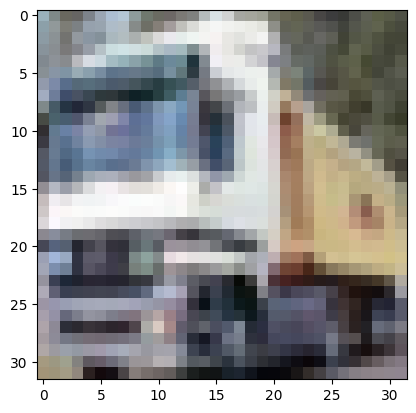

In [74]:
plt.imshow(training_images[1])

In [84]:
model = conv_autoencoder.ConvolutionalAutoencoder(conv_autoencoder.Autoencoder(conv_autoencoder.Encoder(), conv_autoencoder.Decoder()))


In [86]:
model.summary()

Running on the CPU


AttributeError: 'ConvolutionalAutoencoder' object has no attribute 'summary'